In [276]:
# **MILESTONE 1**


In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [278]:

file_path = f"Data sheet.xlsx"  
data = pd.ExcelFile(file_path)


master_current = data.parse('Master_current')
level1_expected = data.parse('Level1_expected_data')


master_current.rename(columns={'REVENUE_2024': 'REVENUE_current', 
                               'EBITA_MARGIN': 'EBITA_MARGIN_current', 
                               'CAPEX (SO FAR)': 'CAPEX_current'}, inplace=True)

level1_expected.rename(columns={'REVENUE_2025': 'REVENUE_forecasted', 
                                'EBITA_MARGIN': 'EBITA_MARGIN_forecasted', 
                                'CAPEX ( additional)': 'CAPEX_additional'}, inplace=True)


In [279]:

merged_data = pd.merge(master_current, level1_expected, on="STOCK_TICKER")


In [280]:

merged_data['PAT_revenue'] = merged_data['PAT'] * (merged_data['REVENUE_forecasted'] / merged_data['REVENUE_current']) ** 1.5
print("PAT based on Revenue:")
print(merged_data[['STOCK_TICKER', 'PAT', 'PAT_revenue']])


merged_data['PAT_margin'] = merged_data['PAT'] * (merged_data['EBITA_MARGIN_forecasted'] / merged_data['EBITA_MARGIN_current']) ** 1.2
print("\nPAT based on Margin:")
print(merged_data[['STOCK_TICKER', 'PAT', 'PAT_margin']])


merged_data['CAPEX_forecasted_total'] = merged_data['CAPEX_current'] + merged_data['CAPEX_additional'].fillna(0)
merged_data['PAT_capex'] = merged_data['PAT'] * (merged_data['CAPEX_forecasted_total'] / merged_data['CAPEX_current']) ** 1.5
print("\nPAT based on Capex:")
print(merged_data[['STOCK_TICKER', 'PAT', 'PAT_capex']])



PAT based on Revenue:
   STOCK_TICKER   PAT  PAT_revenue
0     ZENTEC.NS   130   380.301555
1      TITAN.NS  3496  5607.782224
2       PGEL.NS   135   206.881790
3  KLBRENG-B.BO    40    89.168932
4        HAL.NS  6600  8160.991115
5  BRITANNIA.NS  2134  2573.736428

PAT based on Margin:
   STOCK_TICKER   PAT   PAT_margin
0     ZENTEC.NS   130   107.518792
1      TITAN.NS  3496  4350.998356
2       PGEL.NS   135   219.605534
3  KLBRENG-B.BO    40    40.000000
4        HAL.NS  6600  7349.293892
5  BRITANNIA.NS  2134  2269.478583

PAT based on Capex:
   STOCK_TICKER   PAT     PAT_capex
0     ZENTEC.NS   130    130.000000
1      TITAN.NS  3496   4686.045778
2       PGEL.NS   135    244.377207
3  KLBRENG-B.BO    40     59.289122
4        HAL.NS  6600  10668.771688
5  BRITANNIA.NS  2134   2134.000000


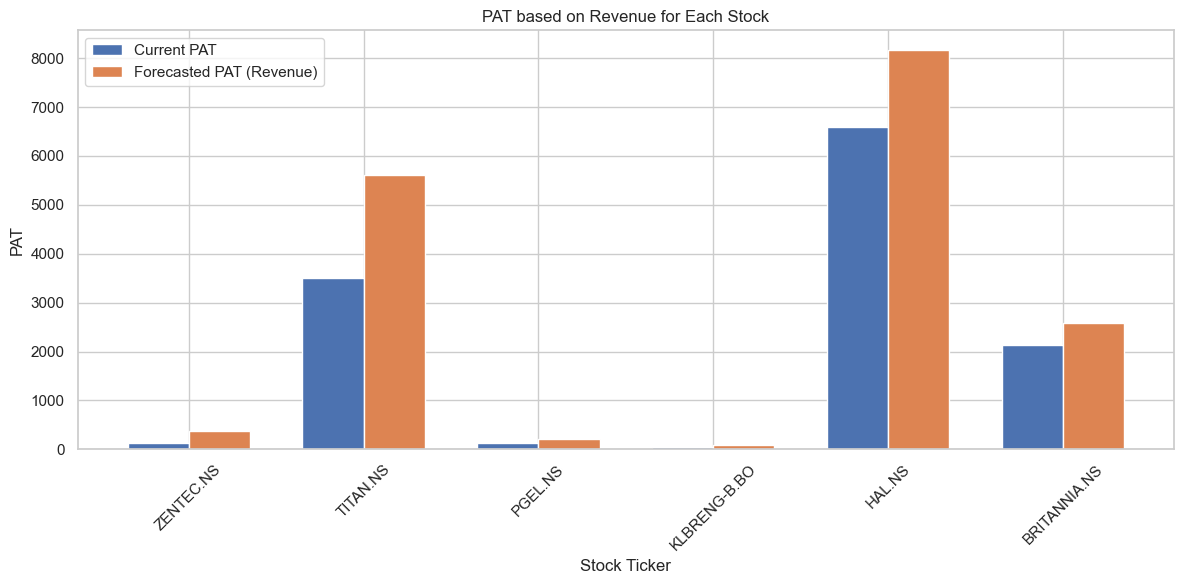

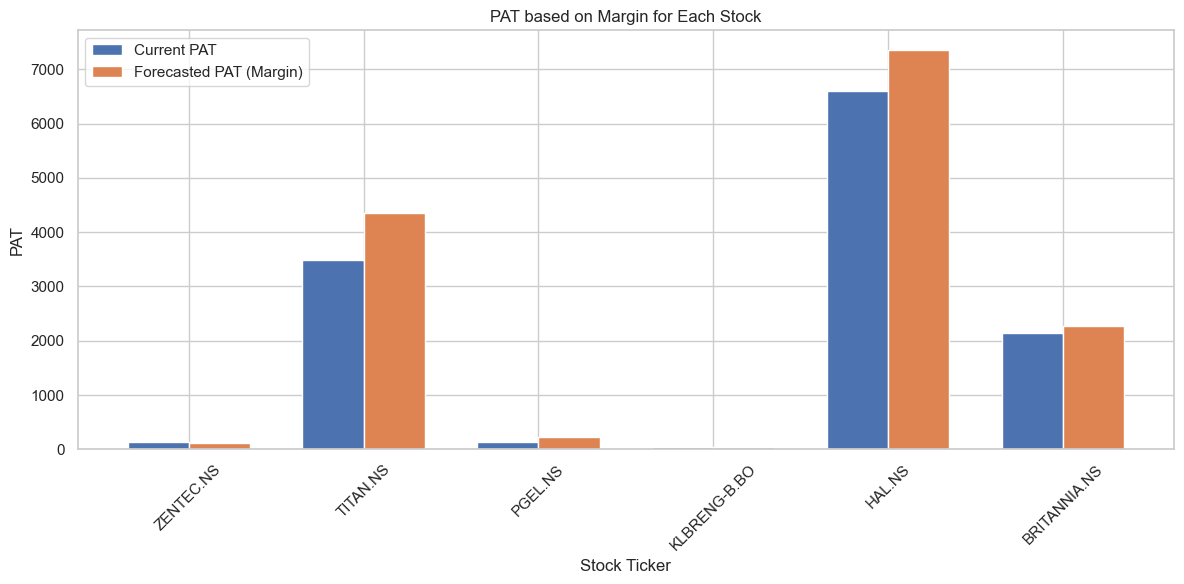

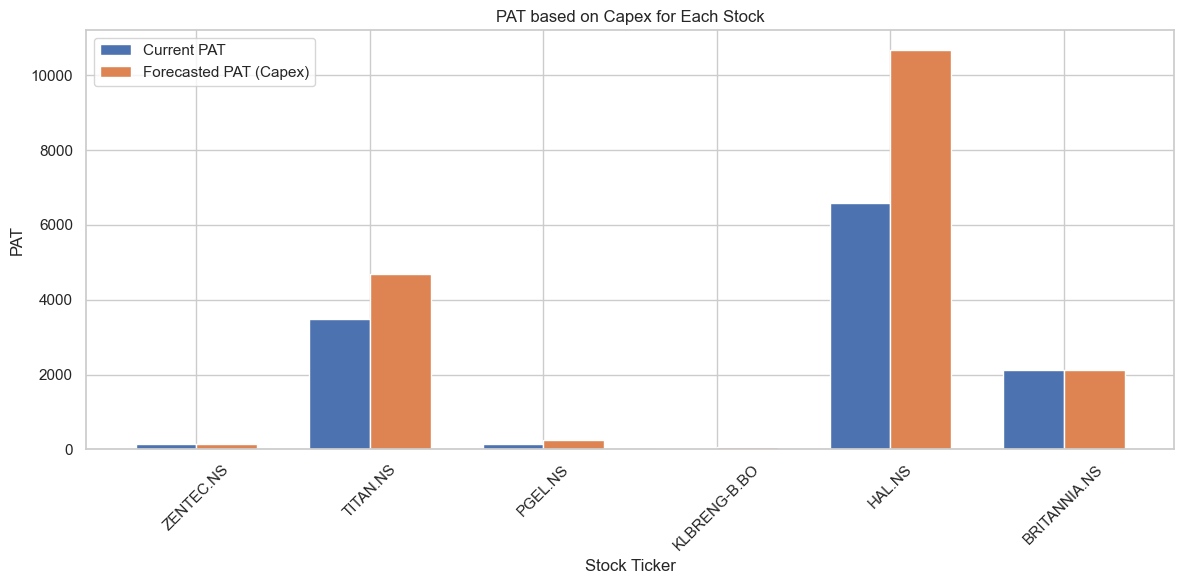

In [281]:

sns.set(style="whitegrid")

# Plotting for PAT based on Revenue
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(merged_data['STOCK_TICKER']))

plt.bar(x, merged_data['PAT'], width=bar_width, label='Current PAT')
plt.bar([p + bar_width for p in x], merged_data['PAT_revenue'], width=bar_width, label='Forecasted PAT (Revenue)')

plt.xlabel('Stock Ticker')
plt.ylabel('PAT')
plt.title('PAT based on Revenue for Each Stock')
plt.xticks([p + bar_width / 2 for p in x], merged_data['STOCK_TICKER'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for PAT based on Margin
plt.figure(figsize=(12, 6))
plt.bar(x, merged_data['PAT'], width=bar_width, label='Current PAT')
plt.bar([p + bar_width for p in x], merged_data['PAT_margin'], width=bar_width, label='Forecasted PAT (Margin)')

plt.xlabel('Stock Ticker')
plt.ylabel('PAT')
plt.title('PAT based on Margin for Each Stock')
plt.xticks([p + bar_width / 2 for p in x], merged_data['STOCK_TICKER'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for PAT based on Capex
plt.figure(figsize=(12, 6))
plt.bar(x, merged_data['PAT'], width=bar_width, label='Current PAT')
plt.bar([p + bar_width for p in x], merged_data['PAT_capex'], width=bar_width, label='Forecasted PAT (Capex)')

plt.xlabel('Stock Ticker')
plt.ylabel('PAT')
plt.title('PAT based on Capex for Each Stock')
plt.xticks([p + bar_width / 2 for p in x], merged_data['STOCK_TICKER'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [282]:

merged_data['PAT_avg'] = merged_data[['PAT_revenue', 'PAT_margin', 'PAT_capex']].mean(axis=1)


merged_data['PAT_rank'] = merged_data['PAT_avg'].rank(ascending=False)





In [283]:

print(merged_data.iloc[:, :len(merged_data.columns)//2])


print(merged_data.iloc[:, len(merged_data.columns)//2:])

   STOCK_TICKER            COMPANY NAME  REVENUE_current  EBITA_MARGIN_current  CAPEX_current   PAT  FAIR  STOCK_PRICE  REVENUE_forecasted
0     ZENTEC.NS       Zen Technologies               440                    41             93   130                820                 900
1      TITAN.NS                  Titan             51084                    10           3709  3496               2800               70000
2       PGEL.NS         PG Electroplast             2746                    10            783   135                310                3650
3  KLBRENG-B.BO     Kilburn Engineering              293                    22            100    40                400                 500
4        HAL.NS  Hindustan Aeronautics             30381                    32           7950  6600               3400               35000
5  BRITANNIA.NS   Britannia Industries             16769                    19           2890  2134               4600               19000
   EBITA_MARGIN_forecasted 

In [284]:

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)


merged_data['PAT_avg'] = merged_data[['PAT_revenue', 'PAT_margin', 'PAT_capex']].mean(axis=1)


merged_data['PAT_Growth_%'] = ((merged_data['PAT_avg'] - merged_data['PAT']) / merged_data['PAT']) * 100


ranked_stocks = merged_data.sort_values(by='PAT_Growth_%', ascending=False).reset_index(drop=True)
ranked_stocks['PAT_Rank'] = ranked_stocks.index + 1


ranked_stocks_display = ranked_stocks[['PAT_Rank', 'STOCK_TICKER', 'COMPANY NAME', 'PAT', 'PAT_avg', 'PAT_Growth_%']]
print("\nRanked Stocks Based on PAT Growth Percentage:")
print(ranked_stocks_display)


Ranked Stocks Based on PAT Growth Percentage:
   PAT_Rank  STOCK_TICKER            COMPANY NAME   PAT      PAT_avg  PAT_Growth_%
0         1       PGEL.NS         PG Electroplast   135   223.621510     65.645563
1         2     ZENTEC.NS       Zen Technologies    130   205.940116     58.415474
2         3  KLBRENG-B.BO     Kilburn Engineering    40    62.819352     57.048379
3         4      TITAN.NS                  Titan   3496  4881.608786     39.634119
4         5        HAL.NS  Hindustan Aeronautics   6600  8726.352232     32.217458
5         6  BRITANNIA.NS   Britannia Industries   2134  2325.738337      8.984927


In [285]:
# **MILESTONE 2**

     Company  Year  Revenue  EBITDA_Margin   CAPEX     PAT  log_revenue  log_capex  PAT_margin  Revenue_to_CAPEX   EBITDA
0  BRITANNIA  2024  16769.0           19.0  2890.0  2134.0     9.727347   7.969358    0.127259          5.802422  3186.11
1  BRITANNIA  2023  16301.0           17.0  2756.0  1816.0     9.699043   7.921898    0.111404          5.914731  2771.17
2  BRITANNIA  2022  14136.0           16.0  2180.0  1516.0     9.556551   7.687539    0.107244          6.484404  2261.76
3  BRITANNIA  2021  13136.0           19.0  2056.0  1851.0     9.483188   7.629004    0.140910          6.389105  2495.84
4  BRITANNIA  2020  11600.0           16.0  1878.0  1394.0     9.358847   7.538495    0.120172          6.176784  1856.00
Model evaluation results with K-Fold Cross-Validation:
                    Model  Avg Test MAE
0      Linear Regression     59.714200
1  Polynomial Regression    363.544020
2       Lasso Regression     59.504579
3       Ridge Regression     59.603849
4         Bayesia

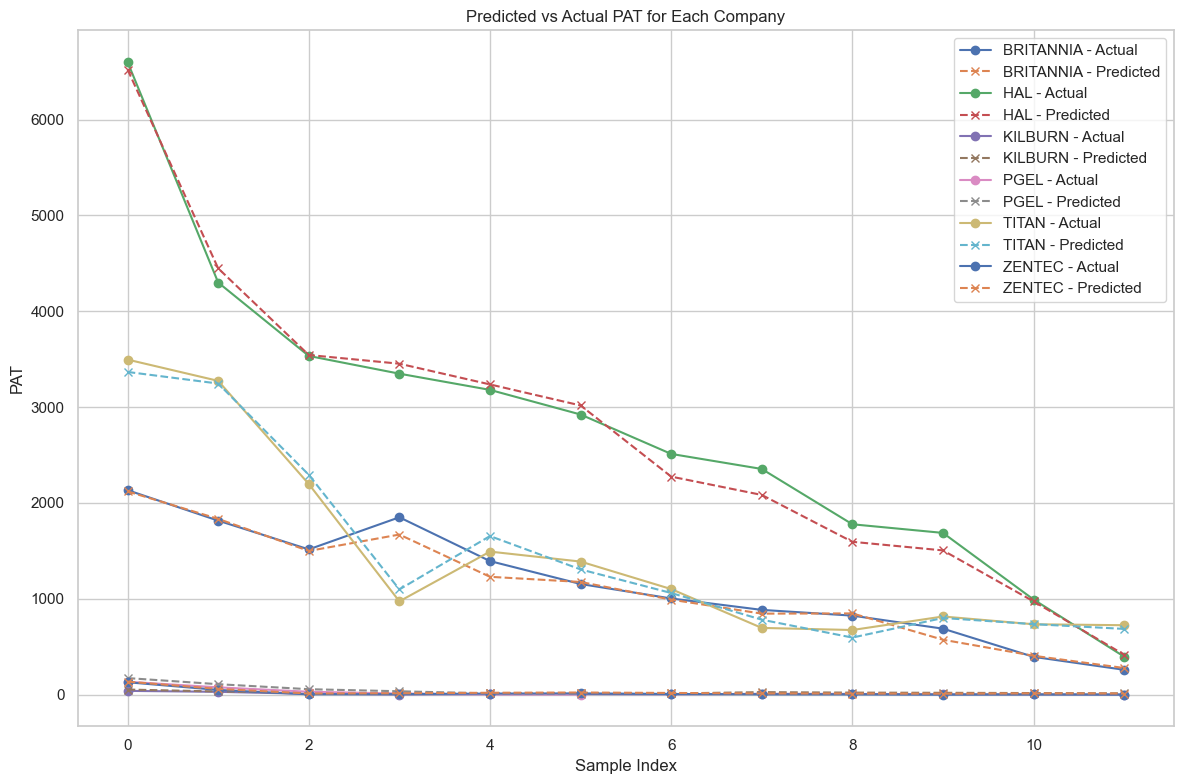

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def load_data(filepath):
    data = pd.read_csv(filepath)
    data.dropna(inplace=True)
    return data

# Feature Engineering
def feature_engineering(data):
    data.rename(columns={
        'Company Name': 'Company',
        'REVENUE': 'Revenue',
        'EBITA_MARGIN': 'EBITDA_Margin',
        'TOTAL_CAPEX': 'CAPEX',
        'PAT': 'PAT',
        'FAIR  STOCK_PRICE': 'Fair_Stock_Price'
    }, inplace=True)
    
    data['log_revenue'] = np.log1p(data['Revenue'])
    data['log_capex'] = np.log1p(data['CAPEX'])
    data['PAT_margin'] = data['PAT'] / data['Revenue']
    data['Revenue_to_CAPEX'] = data['Revenue'] / data['CAPEX']
    data['EBITDA'] = (data['Revenue'] * data['EBITDA_Margin'] / 100)
    data.drop('Fair_Stock_Price', axis=1, inplace=True)
    return data


def prepare_features(data):
    features = data[['Revenue', 'CAPEX', 'EBITDA', 'EBITDA_Margin', 'Revenue_to_CAPEX', 'log_revenue', 'log_capex']]
    target = data['PAT']
    return features, target

# Model Evaluation with K-Fold Cross-Validation
def evaluate_models_kfold(X, y, k=5):
    models = {
        'Linear Regression': LinearRegression(),
        'Polynomial Regression': PolynomialFeatures(degree=2),
        'Lasso Regression': Lasso(alpha=0.1),
        'Ridge Regression': Ridge(alpha=0.1),
        'Bayesian Ridge': BayesianRidge(),
        'Decision Tree': DecisionTreeRegressor(max_depth=5),
        'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, max_depth=10)
    }
    
    results = []
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    best_model_name = ""
    best_model = None
    lowest_mae = float('inf')

    for model_name, model in models.items():
        train_maes, test_maes = [], []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            if model_name == "Polynomial Regression":
                poly = PolynomialFeatures(degree=2)
                X_train_poly = poly.fit_transform(X_train)
                X_test_poly = poly.transform(X_test)
                linear = LinearRegression()
                linear.fit(X_train_poly, y_train)
                y_test_pred = linear.predict(X_test_poly)
            else:
                model.fit(X_train, y_train)
                y_test_pred = model.predict(X_test)

            # Calculate Metrics
            test_maes.append(mean_absolute_error(y_test, y_test_pred))

        avg_test_mae = np.mean(test_maes)

        results.append({
            'Model': model_name,
            'Avg Test MAE': avg_test_mae,
        })

        if avg_test_mae < lowest_mae:
            lowest_mae = avg_test_mae
            best_model = model
            best_model_name = model_name

    results_df = pd.DataFrame(results)
    return results_df, best_model, best_model_name

# Plot Predictions vs Actuals
def plot_best_model_predictions(data, model):
    features, target = prepare_features(data)
    companies = data['Company'].unique()
    
    plt.figure(figsize=(12, 8))

    for company in companies:
        company_data = data[data['Company'] == company]
        X_company = features.loc[company_data.index]
        y_actual = target.loc[company_data.index]
        y_pred = model.predict(X_company)

        plt.plot(y_actual.values, label=f"{company} - Actual", marker='o')
        plt.plot(y_pred, label=f"{company} - Predicted", linestyle='--', marker='x')

    plt.title("Predicted vs Actual PAT for Each Company")
    plt.xlabel("Sample Index")
    plt.ylabel("PAT")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Main Script
if __name__ == "__main__":
 
    filepath = r"Data sheet2 - 10_year_data.csv"  # Update with your actual file path
    data = load_data(filepath)
    data = feature_engineering(data)
    
    print(data.head())
   
    X, y = prepare_features(data)

    
    results_df, final_model, best_model_name = evaluate_models_kfold(X, y, k=5)
    print("Model evaluation results with K-Fold Cross-Validation:\n", results_df)
    print(f"\nBest Model: {best_model_name}")

  
    plot_best_model_predictions(data, final_model)


In [287]:
import pickle

# Save the Gaussian Naive Bayes model
with open('model.pkl', 'wb') as nb_file:
    pickle.dump(final_model, nb_file)

In [288]:
d=pd.read_csv('kd.csv')

In [289]:
d.head()



,STOCK_TICKER,REVENUE_2025,EBITA_MARGIN,CAPEX ( additional),CAPEX
0,KLBRENG-B.BO,500,22,30,130
1,PGEL.NS,3650,15,380,1163
2,HAL.NS,35000,35,3000,10950
3,TITAN.NS,70000,12,800,4509
4,ZENTEC.NS,900,35,12,105


In [290]:
import pandas as pd
import numpy as np
import pickle


test_data = pd.read_csv('kd.csv')

# Feature Engineering
def feature_engineering(data):
    
    data.rename(columns={
        'STOCK_TICKER': 'Company',
        'REVENUE_2025': 'Revenue',
        'EBITA_MARGIN': 'EBITDA_Margin',
        'CAPEX ( additional)': 'CAPEX_Additional',
        'CAPEX': 'CAPEX'
    }, inplace=True)
    
   
    data['log_revenue'] = np.log1p(data['Revenue'])
    data['log_capex'] = np.log1p(data['CAPEX'])
    data['Revenue_to_CAPEX'] = data['Revenue'] / data['CAPEX']
    data['EBITDA'] = data['Revenue'] * data['EBITDA_Margin'] / 100
    
   
    data.drop(['CAPEX_Additional'], axis=1, inplace=True)
    
    return data


test_data = feature_engineering(test_data)


features_to_use = ['Revenue', 'CAPEX', 'EBITDA', 'EBITDA_Margin', 'Revenue_to_CAPEX', 'log_revenue', 'log_capex']
test_features = test_data[features_to_use]


with open('model.pkl', 'rb') as nb_file:
    loaded_model = pickle.load(nb_file)


predictions = loaded_model.predict(test_features)


test_data['Predicted_PAT'] = predictions
print(test_data[['Company', 'Predicted_PAT']])


        Company  Predicted_PAT
0  KLBRENG-B.BO      84.572953
1       PGEL.NS     351.146933
2        HAL.NS    8191.510387
3      TITAN.NS    5612.497670
4     ZENTEC.NS     229.427628
5  BRITANNIA.NS    2527.212340


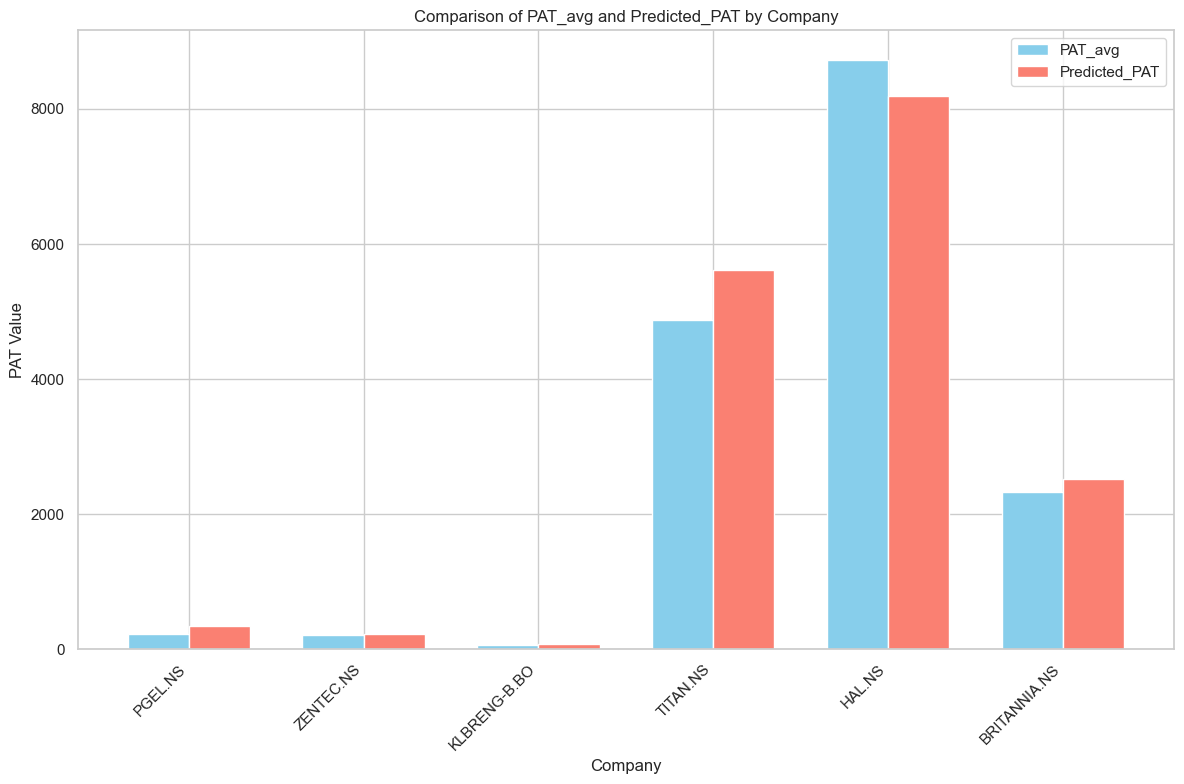

In [291]:
import matplotlib.pyplot as plt
import numpy as np


merged_data_for_plot = pd.merge(ranked_stocks, test_data, how='left', left_on='STOCK_TICKER', right_on='Company')


company_names = merged_data_for_plot['STOCK_TICKER']  # Use STOCK_TICKER as the x-axis labels
PAT_avg = merged_data_for_plot['PAT_avg']
Predicted_PAT = merged_data_for_plot['Predicted_PAT']


fig, ax = plt.subplots(figsize=(12, 8))


bar_width = 0.35
index = np.arange(len(company_names))


bar1 = ax.bar(index, PAT_avg, bar_width, label='PAT_avg', color='skyblue')
bar2 = ax.bar(index + bar_width, Predicted_PAT, bar_width, label='Predicted_PAT', color='salmon')


ax.set_xlabel('Company')
ax.set_ylabel('PAT Value')
ax.set_title('Comparison of PAT_avg and Predicted_PAT by Company')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(company_names, rotation=45, ha='right')
ax.legend()


plt.tight_layout()
plt.show()


In [292]:
# **Milestone 4**


In [293]:
import yfinance as yf

In [294]:
from scipy.optimize import minimize


In [295]:

def download_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

In [296]:

def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights) * 252  # Expected annual return
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return portfolio_return, portfolio_std_dev


def sharpe_ratio(portfolio_return, portfolio_std_dev, risk_free_rate):
    return (portfolio_return - risk_free_rate) / portfolio_std_dev


def minimize_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]  # Return only the risk (volatility)


def find_min_variance_portfolio(mean_returns, cov_matrix, bounds):
    num_assets = len(mean_returns)

   
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})


    initial_weights = num_assets * [1. / num_assets]

   
    result = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result


def optimize_portfolio_for_return(mean_returns, cov_matrix, target_return, bounds):
    num_assets = len(mean_returns)

   
    def portfolio_return(weights):
        return np.sum(mean_returns * weights) * 252


    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: portfolio_return(x) - target_return})


    initial_weights = num_assets * [1. / num_assets]

  
    result = minimize(minimize_volatility, initial_weights, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

    return result


def efficient_frontier(mean_returns, cov_matrix, return_targets, bounds):
    frontier_returns = []
    frontier_risks = []
    for target_return in return_targets:
        optimal_portfolio = optimize_portfolio_for_return(mean_returns, cov_matrix, target_return, bounds)
        if optimal_portfolio.success:
            weights = optimal_portfolio.x
            expected_return, expected_risk = portfolio_performance(weights, mean_returns, cov_matrix)
            frontier_returns.append(expected_return)
            frontier_risks.append(expected_risk)
    return frontier_returns, frontier_risks


def calculate_tangency_portfolio(mean_returns, cov_matrix, risk_free_rate, bounds):
    num_assets = len(mean_returns)

    
    def negative_sharpe_ratio(weights):
        portfolio_return, portfolio_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
        return -(portfolio_return - risk_free_rate) / portfolio_std_dev  # Maximize Sharpe ratio

  
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

     
    initial_weights = num_assets * [1. / num_assets]

   
    result = minimize(negative_sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [297]:
# Main execution
tickers = ['BRITANNIA.NS', 'HAL.NS', 'KLBRENG-B.BO','PGEL.NS','TITAN.NS','ZENTEC.NS']  # Replace with the desired securities
start_date = '2020-11-07'
end_date = '2024-11-07'


data = download_data(tickers, start_date, end_date)


returns = data.pct_change().dropna()

returns.head()


[*********************100%***********************]  6 of 6 completed
/var/folders/f5/lq8wqw611tn2kyj0sc_l7b880000gn/T/ipykernel_16613/1526693074.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Ticker,BRITANNIA.NS,HAL.NS,KLBRENG-B.BO,PGEL.NS,TITAN.NS,ZENTEC.NS
Date,,,,,,
2020-11-10 00:00:00+00:00,-0.011259,0.012872,-0.069164,0.043459,0.015836,-0.022541
2020-11-11 00:00:00+00:00,-0.004447,0.004809,-0.015480,0.049979,-0.023518,0.013277
2020-11-12 00:00:00+00:00,0.006456,0.033158,-0.015723,0.049980,0.002667,0.057241
2020-11-13 00:00:00+00:00,-0.000242,0.006948,-0.012780,0.049868,0.008098,-0.019570
2020-11-14 00:00:00+00:00,0.003671,0.020241,0.025890,0.049658,-0.001281,0.016633


In [298]:

mean_returns = returns.mean()
cov_matrix = returns.cov()

In [299]:
# annualized return from daily returns

def annualized_return_from_daily_returns(daily_returns):

  return (1 + daily_returns.mean()) ** 252 - 1


annualized_return = annualized_return_from_daily_returns(returns)
print(annualized_return)

Ticker
BRITANNIA.NS    0.170054
HAL.NS          1.057283
KLBRENG-B.BO    1.609021
PGEL.NS         2.243904
TITAN.NS        0.305763
ZENTEC.NS       1.598856
dtype: float64


In [300]:


def standard_deviation_from_mean_daily_returns(daily_returns):

  return daily_returns.std()*100



std_dev_daily_returns = standard_deviation_from_mean_daily_returns(returns)
print("Standard Deviation of Daily Returns:\n", std_dev_daily_returns)

Standard Deviation of Daily Returns:
 Ticker
BRITANNIA.NS    1.235497
HAL.NS          2.156054
KLBRENG-B.BO    3.067298
PGEL.NS         3.372300
TITAN.NS        1.590285
ZENTEC.NS       3.182052
dtype: float64


In [301]:
mean_returns

Ticker
BRITANNIA.NS    0.000623
HAL.NS          0.002867
KLBRENG-B.BO    0.003813
PGEL.NS         0.004681
TITAN.NS        0.001059
ZENTEC.NS       0.003797
dtype: float64

In [302]:
cov_matrix

Ticker,BRITANNIA.NS,HAL.NS,KLBRENG-B.BO,PGEL.NS,TITAN.NS,ZENTEC.NS
Ticker,,,,,,
BRITANNIA.NS,0.000153,0.000026,0.000023,0.000020,0.000042,0.000012
HAL.NS,0.000026,0.000465,0.000123,0.000150,0.000073,0.000188
KLBRENG-B.BO,0.000023,0.000123,0.000941,0.000113,0.000061,0.000152
PGEL.NS,0.000020,0.000150,0.000113,0.001137,0.000087,0.000202
TITAN.NS,0.000042,0.000073,0.000061,0.000087,0.000253,0.000082
ZENTEC.NS,0.000012,0.000188,0.000152,0.000202,0.000082,0.001013


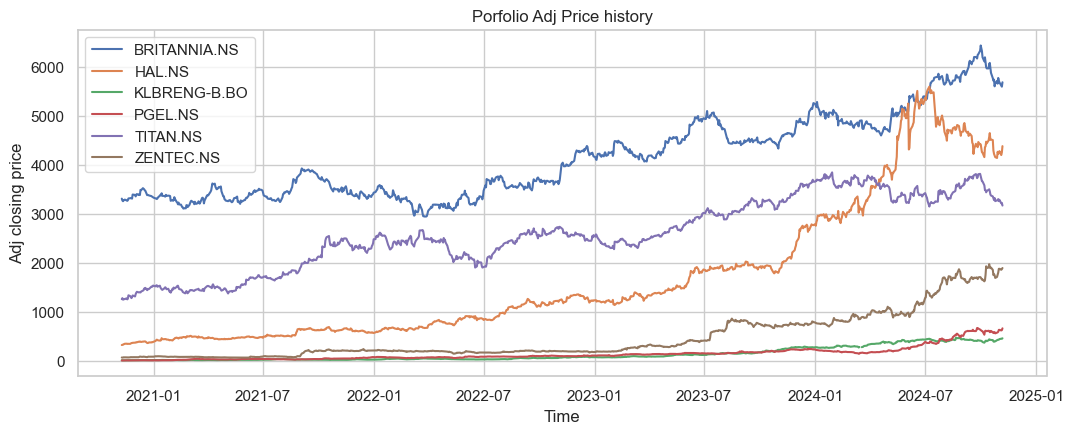

In [303]:
def showGraph(my_stocks):
  ##TITLE
  title="Porfolio Adj Price history"

  
  plt.figure(figsize=(12.5,4.5))

  for c in my_stocks.columns:
    plt.plot(my_stocks[c],label=c)
    plt.title(title)
    plt.ylabel('Adj closing price')
    plt.xlabel('Time')
    plt.legend(my_stocks.columns.values,loc="upper left")
    plt.show

showGraph(data)

In [304]:
print("\nMinimum Variance Portfolio (MVP) without Short Selling:")
print(f"Expected Annual Return: {mvp_no_short_return * 100:.2f}%")
print(f"Risk (Volatility): {mvp_no_short_risk * 100:.2f}%")
print(f"Sharpe Ratio: {mvp_no_short_sharpe:.2f}")


Minimum Variance Portfolio (MVP) without Short Selling:
Expected Annual Return: 34.66%
Risk (Volatility): 15.69%
Sharpe Ratio: 1.83


In [305]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {mvp_no_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 54.38%
HAL.NS: 10.35%
KLBRENG-B.BO: 5.22%
PGEL.NS: 3.31%
TITAN.NS: 23.00%
ZENTEC.NS: 3.74%


In [306]:

tangency_no_short_result = calculate_tangency_portfolio(mean_returns, cov_matrix, risk_free_rate, no_short_bounds)
tangency_no_short_weights = tangency_no_short_result.x
tp_no_short_return, tp_no_short_risk = portfolio_performance(tangency_no_short_weights, mean_returns, cov_matrix)
tp_no_short_sharpe = sharpe_ratio(tp_no_short_return, tp_no_short_risk, risk_free_rate)

In [307]:
print("\nTangency Portfolio (TP) without Short Selling:")
print(f"Expected Annual Return: {tp_no_short_return * 100:.2f}%")
print(f"Risk (Volatility): {tp_no_short_risk * 100:.2f}%")
print(f"Sharpe Ratio: {tp_no_short_sharpe:.2f}")


Tangency Portfolio (TP) without Short Selling:
Expected Annual Return: 87.81%
Risk (Volatility): 26.44%
Sharpe Ratio: 3.09


In [308]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {mvp_no_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 54.38%
HAL.NS: 10.35%
KLBRENG-B.BO: 5.22%
PGEL.NS: 3.31%
TITAN.NS: 23.00%
ZENTEC.NS: 3.74%


In [309]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {tangency_no_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 8.80%
HAL.NS: 27.16%
KLBRENG-B.BO: 23.08%
PGEL.NS: 24.41%
TITAN.NS: 0.00%
ZENTEC.NS: 16.55%


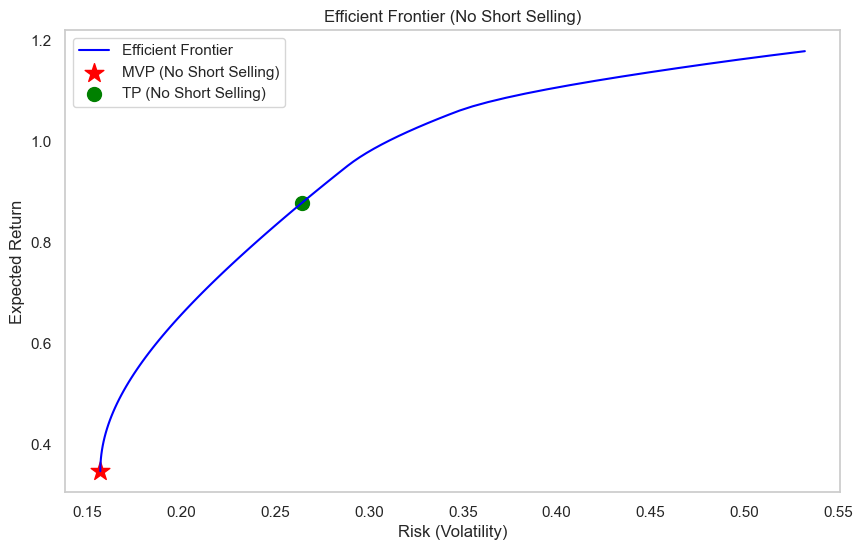

In [310]:
# Efficient Frontier Plot Without Short Selling
return_targets_no_short = np.linspace(mvp_no_short_return, tp_no_short_return+0.3, 100)
frontier_returns_no_short, frontier_risks_no_short = efficient_frontier(mean_returns, cov_matrix, return_targets_no_short, no_short_bounds)

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks_no_short, frontier_returns_no_short, label='Efficient Frontier', color='blue')
plt.scatter(mvp_no_short_risk, mvp_no_short_return, color='red', label='MVP (No Short Selling)', marker='*', s=200)
plt.scatter(tp_no_short_risk, tp_no_short_return, color='green', label='TP (No Short Selling)', marker='o', s=100)
plt.title('Efficient Frontier (No Short Selling)')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid()
plt.show()

In [311]:


coordinate1_x = frontier_risks_no_short[0]  # Minimum risk point (MVP)
coordinate1_y = frontier_returns_no_short[0]
coordinate2_x = frontier_risks_no_short[len(frontier_risks_no_short)//2]  # Mid-point
coordinate2_y = frontier_returns_no_short[len(frontier_returns_no_short)//2]
coordinate3_x = frontier_risks_no_short[-1]  # Maximum risk point (TP)
coordinate3_y = frontier_returns_no_short[-1]
coordinate4_x = frontier_risks_no_short[len(frontier_risks_no_short)//4]  # Quarter point
coordinate4_y = frontier_returns_no_short[len(frontier_returns_no_short)//4]

print(f"Coordinate 1: Risk={coordinate1_x:.4f}, Expected Return={coordinate1_y:.4f}")
print(f"Coordinate 2: Risk={coordinate2_x:.4f}, Expected Return={coordinate2_y:.4f}")
print(f"Coordinate 3: Risk={coordinate3_x:.4f}, Expected Return={coordinate3_y:.4f}")
print(f"Coordinate 4: Risk={coordinate4_x:.4f}, Expected Return={coordinate4_y:.4f}")

Coordinate 1: Risk=0.1569, Expected Return=0.3466
Coordinate 2: Risk=0.2300, Expected Return=0.7665
Coordinate 3: Risk=0.5321, Expected Return=1.1781
Coordinate 4: Risk=0.1780, Expected Return=0.5566


In [312]:
# Case 2: With Short Selling
short_bounds = tuple((-1, 1) for asset in range(len(mean_returns)))


min_variance_short_result = find_min_variance_portfolio(mean_returns, cov_matrix, short_bounds)
mvp_short_weights = min_variance_short_result.x
mvp_short_return, mvp_short_risk = portfolio_performance(mvp_short_weights, mean_returns, cov_matrix)
mvp_short_sharpe = sharpe_ratio(mvp_short_return, mvp_short_risk, risk_free_rate)


tangency_short_result = calculate_tangency_portfolio(mean_returns, cov_matrix, risk_free_rate, short_bounds)
tangency_short_weights = tangency_short_result.x
tp_short_return, tp_short_risk = portfolio_performance(tangency_short_weights, mean_returns, cov_matrix)
tp_short_sharpe = sharpe_ratio(tp_short_return, tp_short_risk, risk_free_rate)

In [313]:
print("\nMinimum Variance Portfolio (MVP) with Short Selling:")
print(f"Expected Annual Return: {mvp_short_return * 100:.2f}%")
print(f"Risk (Volatility): {mvp_short_risk * 100:.2f}%")
print(f"Sharpe Ratio: {mvp_short_sharpe:.2f}")

print("\nTangency Portfolio (TP) with Short Selling:")
print(f"Expected Annual Return: {tp_short_return * 100:.2f}%")
print(f"Risk (Volatility): {tp_short_risk * 100:.2f}%")
print(f"Sharpe Ratio: {tp_short_sharpe:.2f}")


Minimum Variance Portfolio (MVP) with Short Selling:
Expected Annual Return: 34.66%
Risk (Volatility): 15.69%
Sharpe Ratio: 1.83

Tangency Portfolio (TP) with Short Selling:
Expected Annual Return: 88.25%
Risk (Volatility): 26.58%
Sharpe Ratio: 3.09


In [314]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {tangency_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 9.10%
HAL.NS: 27.40%
KLBRENG-B.BO: 23.23%
PGEL.NS: 24.58%
TITAN.NS: -1.01%
ZENTEC.NS: 16.70%


In [315]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {mvp_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 54.38%
HAL.NS: 10.35%
KLBRENG-B.BO: 5.22%
PGEL.NS: 3.31%
TITAN.NS: 23.00%
ZENTEC.NS: 3.74%


In [316]:
print("Portfolio Weights:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {mvp_no_short_weights[i]:.2%}")

Portfolio Weights:
BRITANNIA.NS: 54.38%
HAL.NS: 10.35%
KLBRENG-B.BO: 5.22%
PGEL.NS: 3.31%
TITAN.NS: 23.00%
ZENTEC.NS: 3.74%


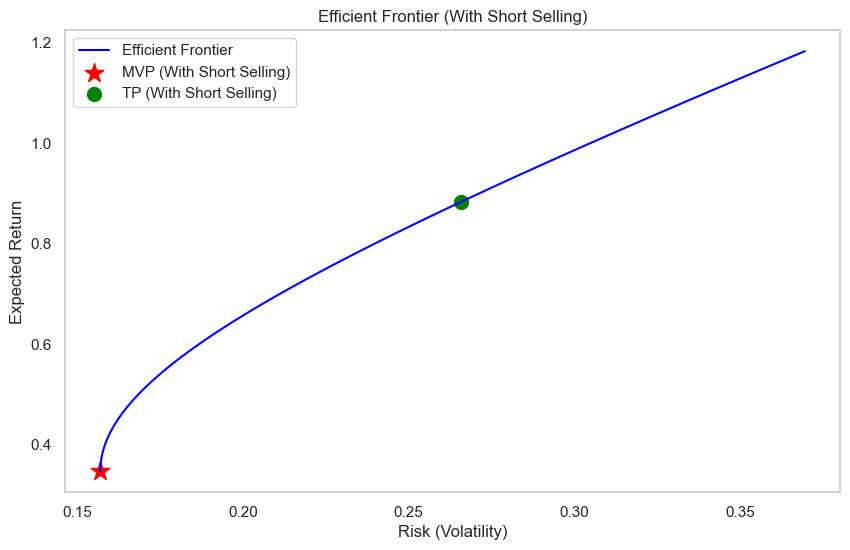

In [317]:
# Efficient Frontier Plot With Short Selling
return_targets_short = np.linspace(mvp_short_return, tp_short_return+0.3, 100)
frontier_returns_short, frontier_risks_short = efficient_frontier(mean_returns, cov_matrix, return_targets_short, short_bounds)

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks_short, frontier_returns_short, label='Efficient Frontier', color='blue')
plt.scatter(mvp_short_risk, mvp_short_return, color='red', label='MVP (With Short Selling)', marker='*', s=200)
plt.scatter(tp_short_risk, tp_short_return, color='green', label='TP (With Short Selling)', marker='o', s=100)
plt.title('Efficient Frontier (With Short Selling)')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.legend()
plt.grid()
plt.show()

In [318]:


# Coordinates for the graph (x = Risk, y = Expected Return)
coordinate1 = (mvp_short_risk, mvp_short_return)  # MVP with short selling
coordinate2 = (tp_short_risk, tp_short_return)    # Tangency Portfolio with short selling
# You can add two more coordinates based on the frontier
coordinate3 = (frontier_risks_short[25], frontier_returns_short[25])
coordinate4 = (frontier_risks_short[75], frontier_returns_short[75])


print("Coordinate 1 (MVP with Short Selling):", coordinate1)
print("Coordinate 2 (TP with Short Selling):", coordinate2)
print("Coordinate 3 (Efficient Frontier):", coordinate3)
print("Coordinate 4 (Efficient Frontier):", coordinate4)

Coordinate 1 (MVP with Short Selling): (0.15691729448615377, 0.3465813939341759)
Coordinate 2 (TP with Short Selling): (0.2657931318665285, 0.8824796228395252)
Coordinate 3 (Efficient Frontier): (0.17821231438675048, 0.55766680527171)
Coordinate 4 (Efficient Frontier): (0.29814560827433306, 0.9798376279529057)
